In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("D:/Sem-6 Lab Files/DSABDAL/Dataset/Iris.csv")
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

### How many features are there and what are their types (e.g., numeric, nominal)?

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Hence the dataset contains 4 numerical columns and 1 object column

In [3]:
np.unique(df["Species"])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

### Create a histogram for each feature in the dataset.

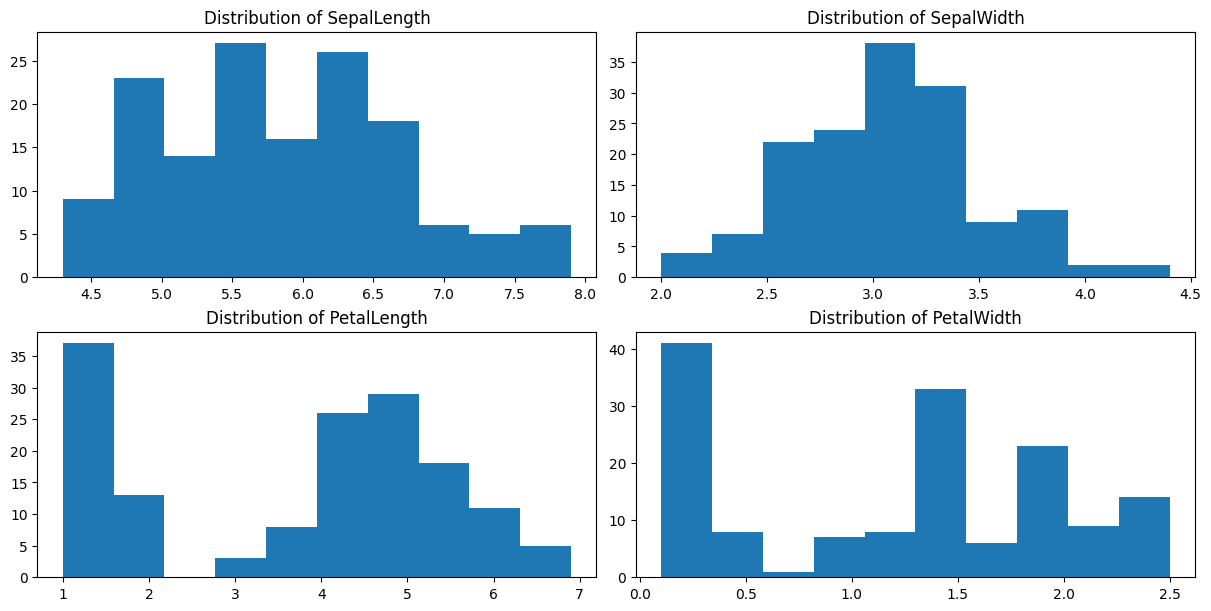

In [5]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 6), constrained_layout = True)

for i in range(4):
    x, y = i // 2, i % 2
    _ = axes[x, y].hist(df[df.columns[i + 1]])
    _ = axes[x, y].set_title(f"Distribution of {df.columns[i + 1][:-2]}")

### Create a boxplot for each feature in the dataset.

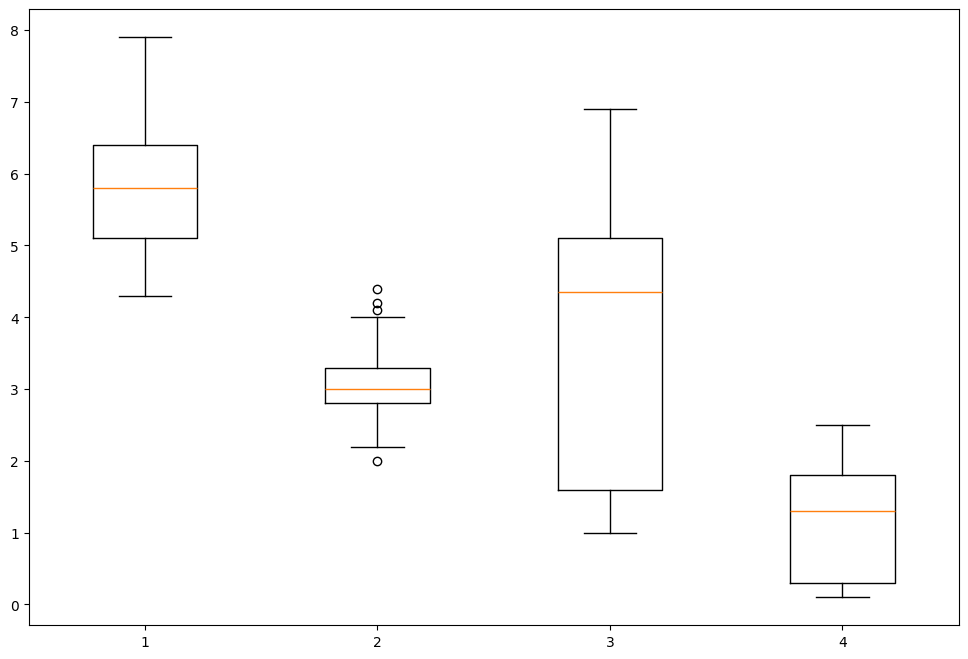

In [6]:
data_to_plot = df[df.columns[1:-1]]

fig, axes = plt.subplots(1, figsize=(12,8))
bp = axes.boxplot(data_to_plot)

If we observe closely for the box 2, interquartile distance is roughly around **0.75** hence the values lying beyond this range of (third quartile + interquartile distance) i.e. roughly around **4.05** will be considered as outliers. Similarly outliers with other boxplots can be found.

In [7]:
print(df[10:21])

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
10  11            5.4           3.7            1.5           0.2  Iris-setosa
11  12            4.8           3.4            1.6           0.2  Iris-setosa
12  13            4.8           3.0            1.4           0.1  Iris-setosa
13  14            4.3           3.0            1.1           0.1  Iris-setosa
14  15            5.8           4.0            1.2           0.2  Iris-setosa
15  16            5.7           4.4            1.5           0.4  Iris-setosa
16  17            5.4           3.9            1.3           0.4  Iris-setosa
17  18            5.1           3.5            1.4           0.3  Iris-setosa
18  19            5.7           3.8            1.7           0.3  Iris-setosa
19  20            5.1           3.8            1.5           0.3  Iris-setosa
20  21            5.4           3.4            1.7           0.2  Iris-setosa


In [8]:
df.head(10).style.highlight_max(color='lightgreen', axis=0)

In [9]:
df.isnull()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0    False          False         False          False         False    False
1    False          False         False          False         False    False
2    False          False         False          False         False    False
3    False          False         False          False         False    False
4    False          False         False          False         False    False
..     ...            ...           ...            ...           ...      ...
145  False          False         False          False         False    False
146  False          False         False          False         False    False
147  False          False         False          False         False    False
148  False          False         False          False         False    False
149  False          False         False          False         False    False

[150 rows x 6 columns]

<Axes: >

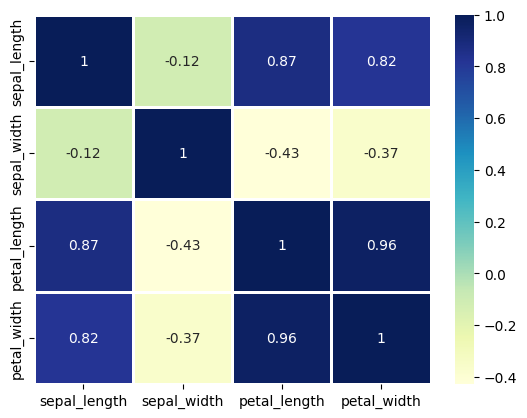

In [10]:
import seaborn as sns
import pandas as pd
iris = sns.load_dataset("iris")
iris_encoded = pd.get_dummies(iris, columns=['species'])
correlation_matrix = iris_encoded.drop(columns=['species_setosa', 'species_versicolor', 'species_virginica']).corr()
sns.heatmap(correlation_matrix, cmap="YlGnBu", linecolor='white', linewidths=1, annot=True)

C:\Users\Atharva\AppData\Local\Temp\ipykernel_21096\2814484678.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  iris_numeric = iris_encoded.apply(pd.to_numeric, errors='ignore')


<Axes: >

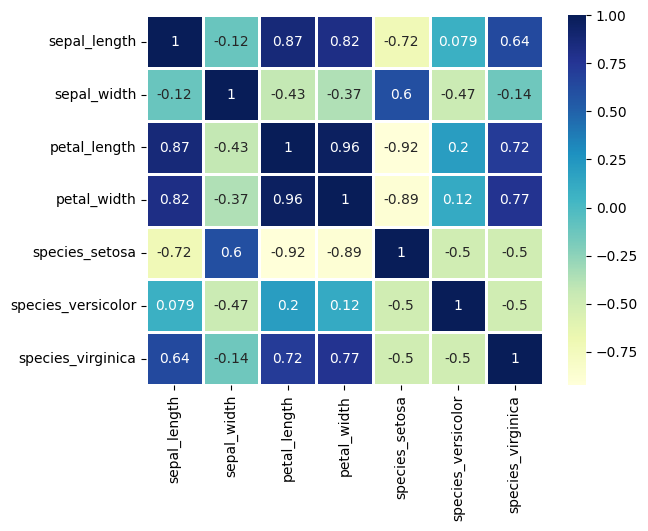

In [11]:
import pandas as pd
import seaborn as sns
iris = sns.load_dataset("iris")
iris_encoded = pd.get_dummies(iris, columns=['species'])
iris_numeric = iris_encoded.apply(pd.to_numeric, errors='ignore')
correlation_matrix = iris_numeric.corr(method='pearson')
sns.heatmap(correlation_matrix, cmap="YlGnBu", linecolor='white', linewidths=1, annot=True)

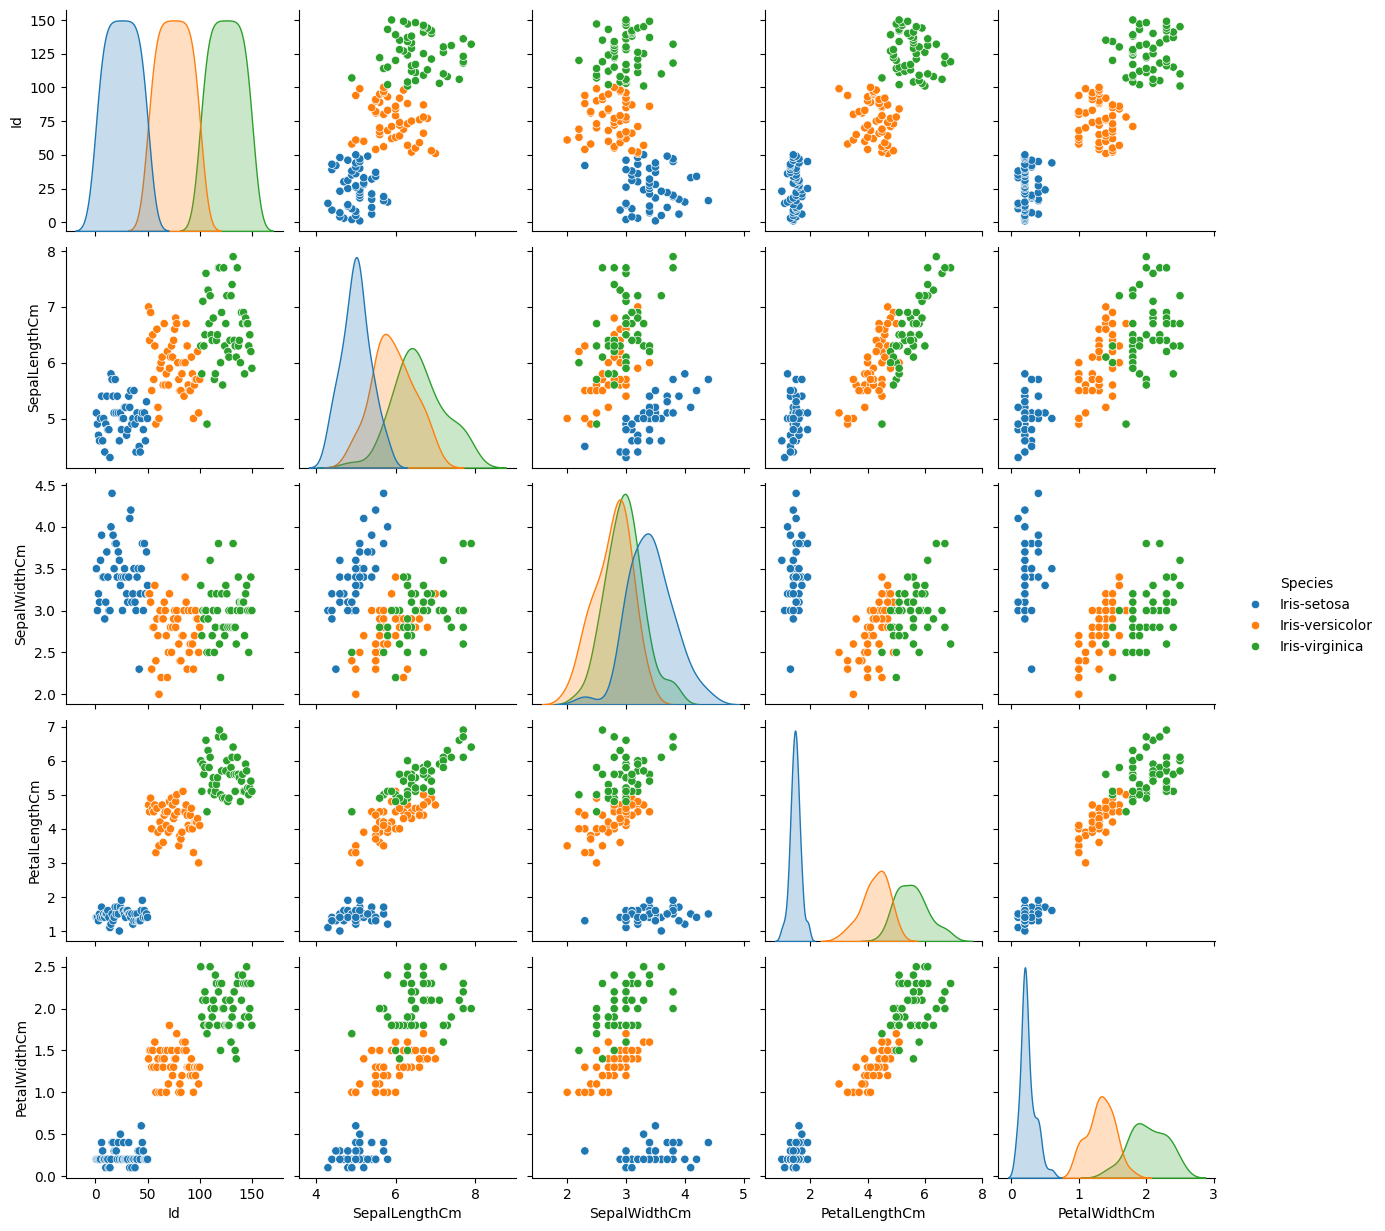

In [12]:
g = sns.pairplot(df,hue="Species")